# Numpy의 polyfit으로 회귀(regression) 분석하기

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
plt.rcParams['axes.unicode_minus'] = False

In [3]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv', encoding='utf-8', thousands=',', names=['date','hit'],index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


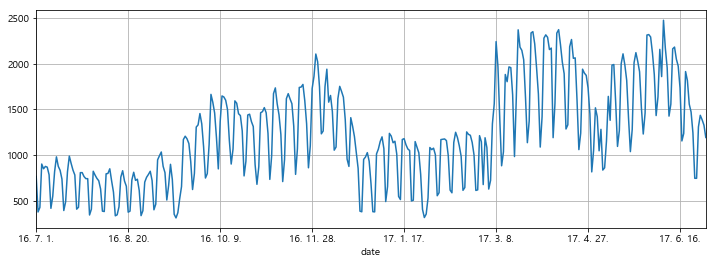

In [5]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [6]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [7]:
def error(f,x,y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [9]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


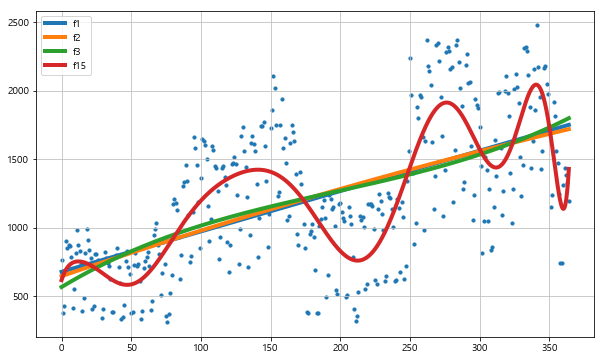

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

# Prophet 모듈을 이용한 forecast 예측

In [62]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [63]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [64]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,911.790860,700.801493,1116.570976
421,2017-08-26,496.917939,292.418968,710.009124
422,2017-08-27,629.458439,414.535469,846.737350
423,2017-08-28,1181.938386,979.097416,1394.767645
424,2017-08-29,1217.864960,1006.055010,1429.752537


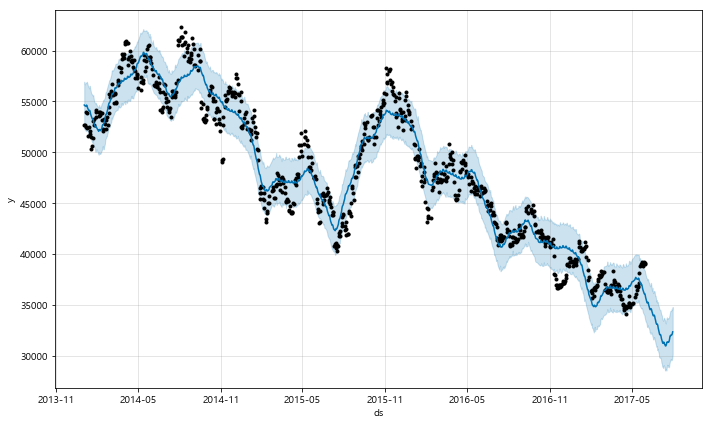

In [91]:
m.plot(forecast);

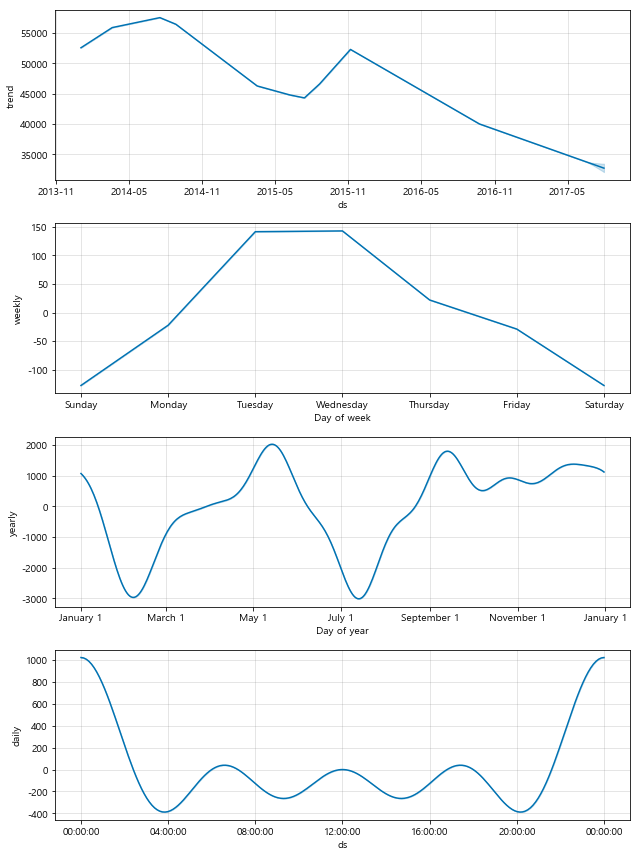

In [90]:
m.plot_components(forecast);

# Seasonal 시계열 분석으로 주식 데이터 분석하기

In [67]:
from pandas_datareader import data
import yfinance as yf
# yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2017-6-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)

KIA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,7665.240234,7300.229980,7404.520020,7665.240234,636300.0,5803.053711
2000-01-05,7404.520020,7248.089844,7404.520020,7248.089844,686100.0,5487.245605
2000-01-06,7519.240234,6935.220215,7331.520020,6935.220215,379000.0,5250.383789
2000-01-07,7143.799805,6778.790039,6987.359863,6778.790039,701400.0,5131.958008
2000-01-10,7102.080078,6810.069824,6841.359863,7091.649902,1076700.0,5368.811523


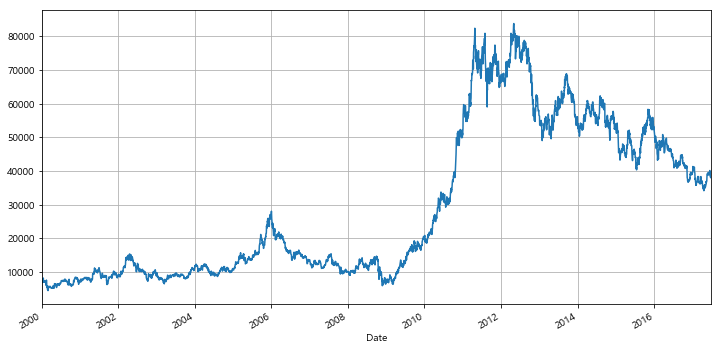

In [68]:
KIA['Close'].plot(figsize=(12,6), grid=True)

In [69]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,7665.240234,7300.229980,7404.520020,7665.240234,636300.0,5803.053711
2000-01-05,7404.520020,7248.089844,7404.520020,7248.089844,686100.0,5487.245605
2000-01-06,7519.240234,6935.220215,7331.520020,6935.220215,379000.0,5250.383789
2000-01-07,7143.799805,6778.790039,6987.359863,6778.790039,701400.0,5131.958008
2000-01-10,7102.080078,6810.069824,6841.359863,7091.649902,1076700.0,5368.811523
2000-01-11,7717.390137,7143.799805,7143.799805,7717.390137,1127200.0,5842.535156
2000-01-12,8447.410156,7300.229980,7717.390137,7508.810059,1606600.0,5684.626465
2000-01-13,7696.529785,7195.939941,7696.529785,7195.939941,702700.0,5447.766113
2000-01-14,7508.810059,6987.359863,7195.939941,7508.810059,843900.0,5684.626465


In [75]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [76]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [77]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4578,2017-12-25
4579,2017-12-26
4580,2017-12-27
4581,2017-12-28
4582,2017-12-29


In [78]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4578,2017-12-25,35755.238273,27530.587845,44537.203940
4579,2017-12-26,35800.435107,27406.385268,44568.183767
4580,2017-12-27,35769.118927,27508.465250,45002.919153
4581,2017-12-28,35734.380073,27082.679480,45508.140683
4582,2017-12-29,35671.333866,27952.738386,44598.414595


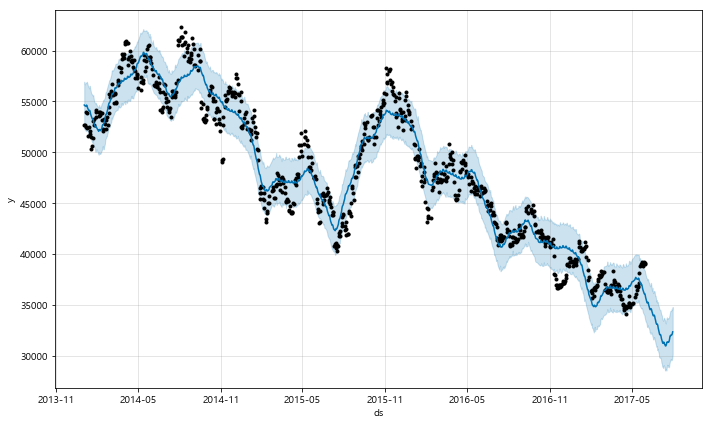

In [89]:
m.plot(forecast);

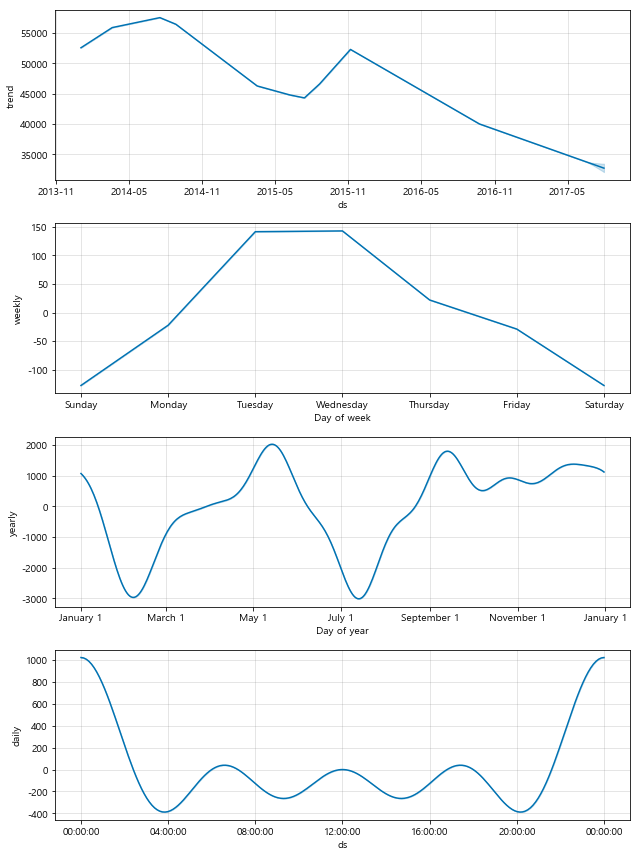

In [88]:
m.plot_components(forecast);

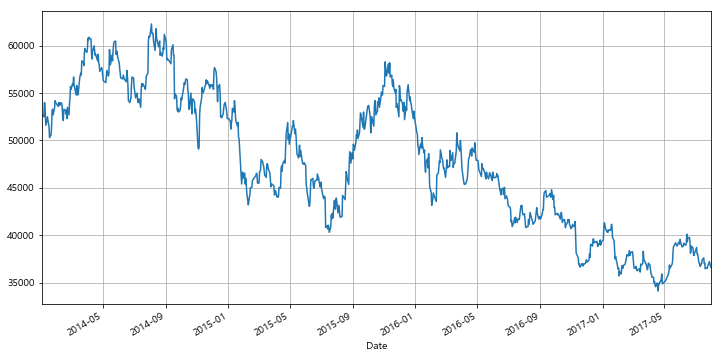

In [81]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

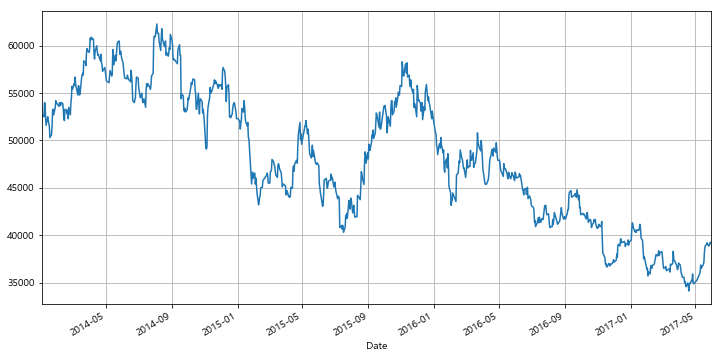

In [82]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [83]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [84]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [85]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


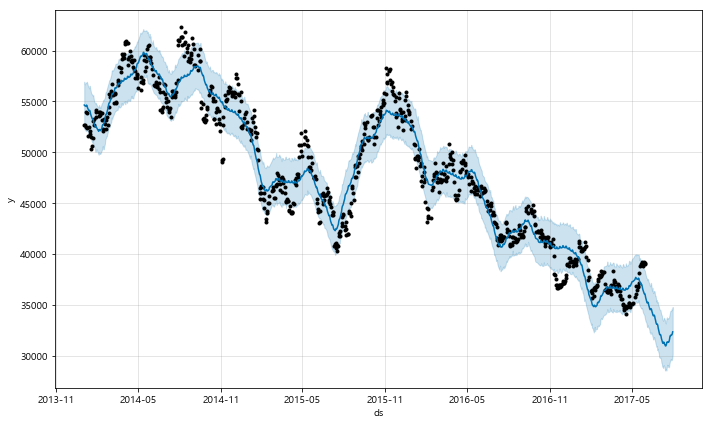

In [86]:
forecast = m.predict(future)
m.plot(forecast);

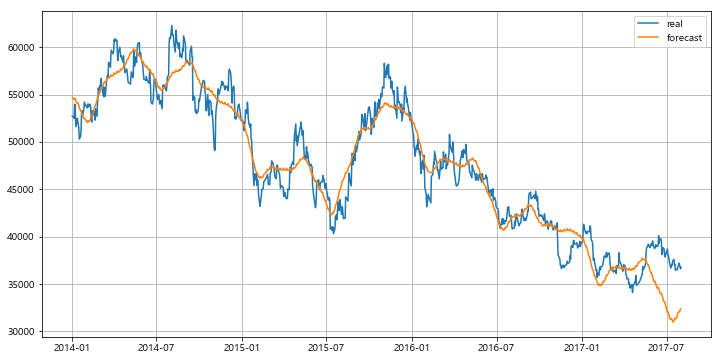

In [87]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

# Growth Model과 Holiday Forecast

In [92]:
df =pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [93]:
df['cap'] = 8.5

In [95]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

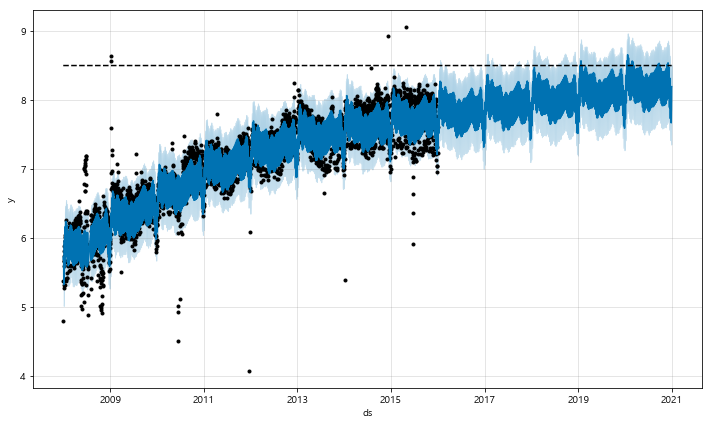

In [96]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

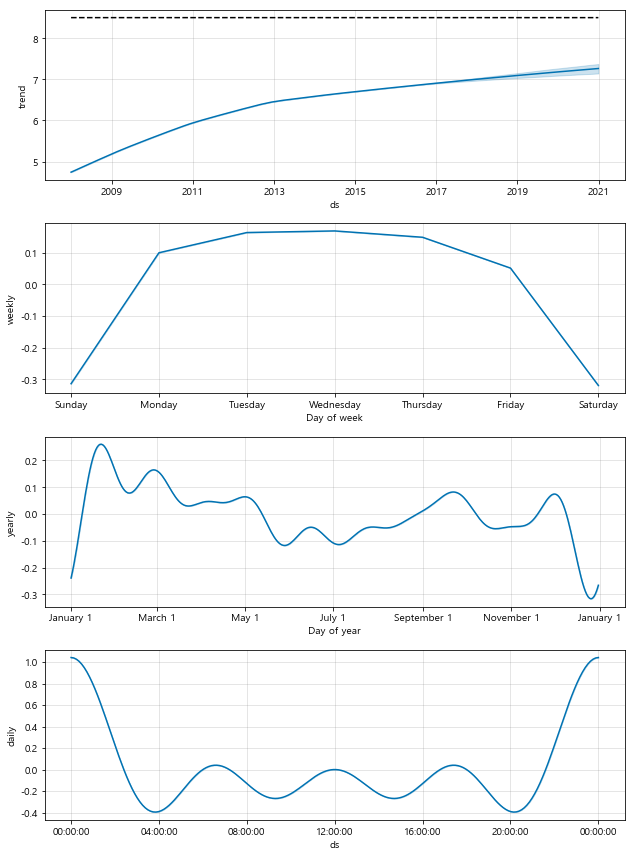

In [98]:
forecast = m.predict(future)
m.plot_components(forecast);

# holiday

In [99]:
df = pd.read_csv('../data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

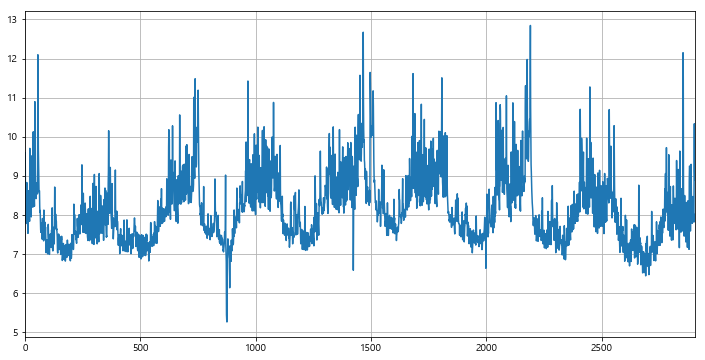

In [100]:
df.y.plot(figsize=(12,6), grid=True);

In [101]:
playoffs = pd.DataFrame({
    'holiday': 'playoff',
    'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
    'lower_window': 0,
    'upper_window': 1,
})
superbowls = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
    'lower_window': 0,
    'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [102]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [103]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds','playoff','superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.224116,1.203719
2191,2014-02-03,1.902824,1.458890
2532,2015-01-11,1.224116,0.000000
2533,2015-01-12,1.902824,0.000000
2901,2016-01-17,1.224116,0.000000
2902,2016-01-18,1.902824,0.000000
2908,2016-01-24,1.224116,0.000000
2909,2016-01-25,1.902824,0.000000
2922,2016-02-07,1.224116,1.203719
2923,2016-02-08,1.902824,1.458890


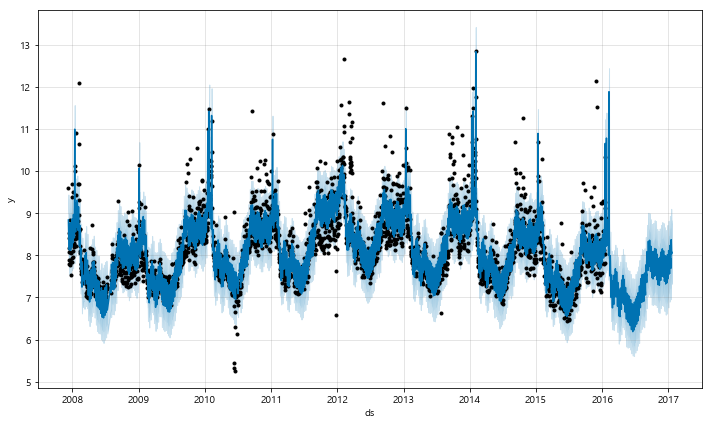

In [104]:
m.plot(forecast);

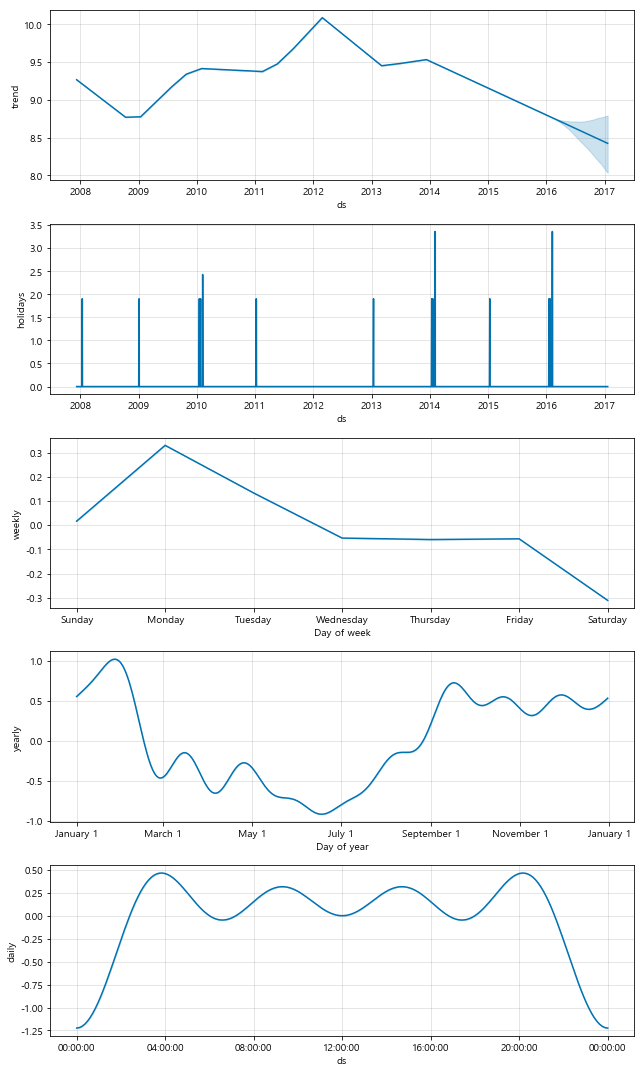

In [106]:
m.plot_components(forecast);